# Python for Machine Learning

### *Session \#3*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Regression and Parametric Models

### Warm Ups

*Type the given code into the cell below*

---

In [1]:
from matplotlib import pyplot as plt

import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, scale
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from yellowbrick.model_selection import LearningCurve, ValidationCurve
from yellowbrick.regressor import ResidualsPlot

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('housing.csv', usecols=range(9))
df = df.dropna()

**Create training/test sets:** 
```
X = df.drop(columns=['median_price'])
y = df['median_price']
X_train, X_test, y_train, y_test = train_test_split(X, y)
```

In [2]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y)

**Train model and show Residuals Plot:** 
```
model = ResidualsPlot(LinearRegression())
model.fit(X_train, y_train)
model.score(X_test, y_test)
```

0.6589432352441238

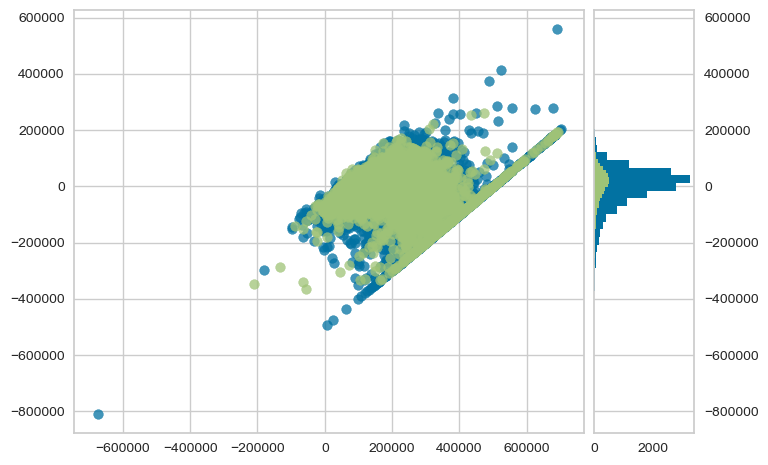

In [3]:
model = ResidualsPlot(LinearRegression())
model.fit(X_train, y_train)
model.score(X_test, y_test)

**Find average error:** 
```python
y_predicted = model.predict(X_test)
mean_absolute_error(y_predicted, y_test)
```

In [4]:
y_predicted = model.predict(X_test)
mean_absolute_error(y_predicted, y_test)

50313.47349125259

### Exercises
---

**1. For each machine learning task, state whether it's better suited for a parametric or non-parametric model:**

* Predicting spread of a contagious disease 
* Recognizing handwritten digits
* Predicting the position of a planet
* Facial recognition

In [5]:
# Parametric, because we know contagious diseases follow a curve (exponential, 
# gaussian, etc)

# Non-parametric, since digits are irregular and do not fall under a general 
# equation

# Parametric, since planets follow elliptical shaped paths. 

# Non-parametric, since facial similarity isn't captured by an equation

**2. Say we are trying to predict car price based on age.**

**For cars _older_ than any of the ones in the training set, how would a linear model predict price? KNN?**

**Which model will perform better on _slightly older_ cars? Which will perform better on _much older_ cars?**

![car_prices](../images/car_prices.png)

In [6]:
# Linear model would continue downward with the same slope. 
# This will perform well for slightly older cars, but eventually will go negative and be very unrealistic.

# KNN model will average together the oldest cars in the training set, 
# to create a prediction for cars older than seen previously. 
# This will be less accurate for slightly older cars, but avoid going negative with very old cars.

**3. Train LinearRegression model and KNN model.** `linear` and `knn`

**What is the R2 and mean absolute error of each?**

In [7]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print(mean_absolute_error(knn.predict(X_test), y_test))

linear = LinearRegression()
linear.fit(X_train, y_train)
print(linear.score(X_test, y_test))
print(mean_absolute_error(linear.predict(X_test), y_test))

0.2832845867072593
76601.31618712076
0.6589432352441238
50313.47349125259


**4. Use** `scale()` **on your feature matrix X before training** `linear` **and** `knn`

**How does this affect the R2 score and mean absolute error of both models?**

In [8]:
X = scale(df.drop(columns=['median_house_value']))
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print(mean_absolute_error(knn.predict(X_test), y_test))

linear = LinearRegression()
linear.fit(X_train, y_train)
print(linear.score(X_test, y_test))
print(mean_absolute_error(linear.predict(X_test), y_test))

0.7092717122362806
42753.69543942063
0.6309982705907405
52124.75086587462


(Linear regression is less affected by scale than K-nearest neighbors)

**5. Paste your solution to the last problem below**


**To study the effect of limited data, rerun** `train_test_split` **with** `test_size=0.95`

**Which model fares better when data is scarce?**

In [9]:
X = scale(df.drop(columns=['median_house_value']))
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95)

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print(mean_absolute_error(knn.predict(X_test), y_test))

linear = LinearRegression()
linear.fit(X_train, y_train)
print(linear.score(X_test, y_test))
print(mean_absolute_error(linear.predict(X_test), y_test))

0.6063654812096282
52086.61017927056
0.6321750573944871
51428.4352890933


(Parametric models (e.g. linear regression) are less harmed by having a smaller dataset.)

**6. Create a residual plot of** `linear` **and** `knn`

**Where model performs better on extreme values? Overall?**

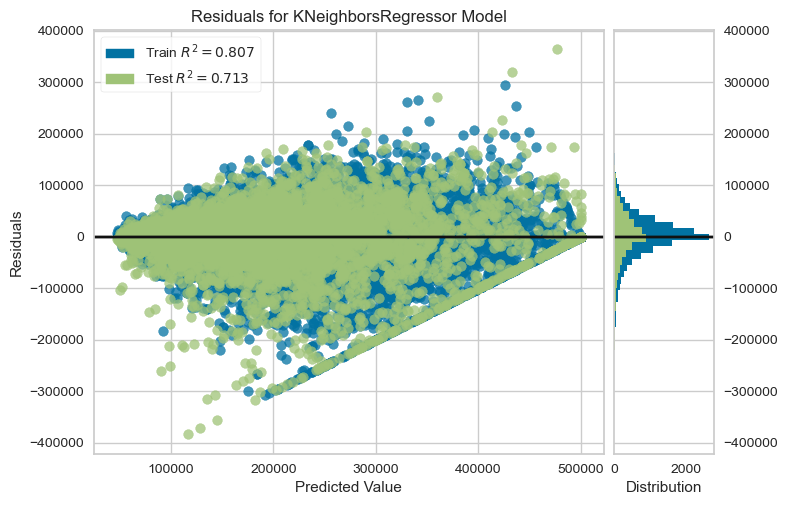

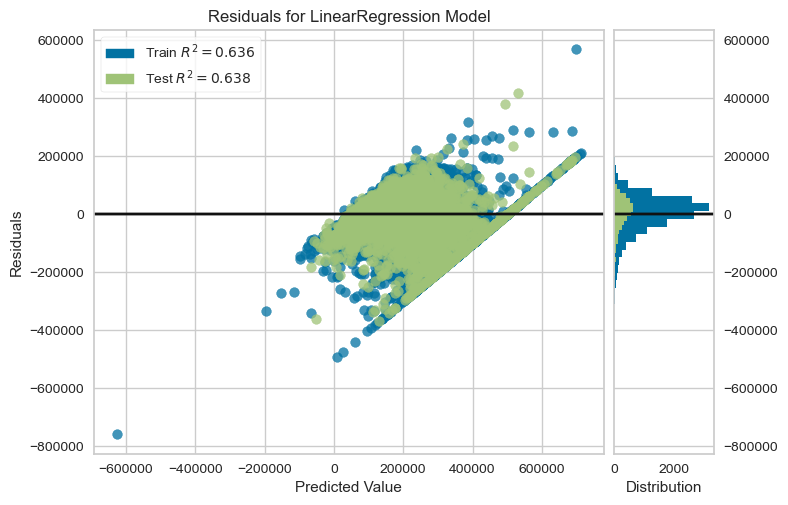

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [10]:
X = scale(df.drop(columns=['median_house_value']))
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = ResidualsPlot(KNeighborsRegressor())
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
knn.finalize()
knn.show()

linear = ResidualsPlot(LinearRegression())
linear.fit(X_train, y_train)
linear.score(X_test, y_test)
linear.finalize()
linear.show()

## II. Overfitting and Regularization

### Warm Ups

*Type the given code into the cell below*

---
**Create a ridge regression model:**
```python
model = Ridge(alpha=1)
```

In [11]:
model = Ridge(alpha=1.)

**Train model and show Learning Curve:** 
```
model_learn = LearningCurve(model)
model_learn.fit(X_train, y_train)
model_learn.finalize()
```

In [12]:
def assign_tts(df, model, tgt_txt, do_scale=False, features='all'):
    if features == 'all':
        X=df.drop(columns=[tgt_txt])
    elif isinstance(features, list):
        X=df[features]
    else:
        raise ValueError('Features should either be \'all\' or a list')
    y=df[tgt_txt]
    if do_scale:
        tts = train_test_split(scale(X),y)
    else:
        tts = train_test_split(X,y)
    model.X_train = tts[0]
    model.X_test = tts[1]
    model.y_train = tts[2]
    model.y_test = tts[3]
    return None
def std_fit(model):
    model.fit(model.X_train, model.y_train)
    return None
def std_predict(model):
    return model.predict(model.X_test)

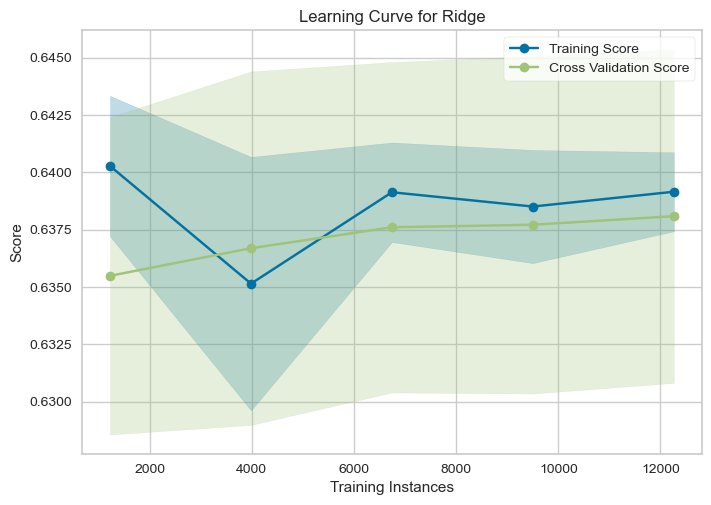

In [13]:
model_learn = LearningCurve(model)
assign_tts(df, model_learn, 'median_house_value', do_scale=True)
std_fit(model_learn)
model_learn.finalize()

**Feature importance:**

In [14]:
def sort_coef(alpha=1.):
    X = df.drop(columns=['median_house_value'])
    y=df['median_house_value']
    X_train,X_test,y_train,y_test=train_test_split(scale(X),y)
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    return pd.DataFrame(model.coef_, 
                        index=X.columns, 
                        columns=['coef']).sort_values('coef')
sort_coef(1.)

,coef
latitude,-90204.702282
longitude,-85117.140482
population,-48449.287042
total_rooms,-17316.729099
housing_median_age,14771.624341
households,22299.449725
total_bedrooms,47321.931115
median_income,76726.626829


### Exercises
---

**1. For each of the following situations, state whether LASSO or Ridge regression would be more appropriate:**

* Predicting height based on thousands of genes
* Predicting rent prices based on a few house/neighborhood features
* Predicting a customer's monthly expenses using features like location, age, etc
* Predicting a patient's blood pressure based on dozens of facts about lifestyle, pre-existing conditions, etc

In [15]:
# LASSO, since lots of features will be irrelevant
# Ridge, since there are few features and many may provide small amount of signal
# Ridge, since these features will all likely contribute a small amount of signal
# LASSO, since lots of features will be irrelevant

**2. Let's see how linear regression can overfit**

**Create your feature matrix and target vector using just the first 100 rows of** `df`

**Train a LinearRegression model from these data sets** 

In [16]:
modelII2 = LinearRegression()
assign_tts(df[:100], modelII2, 'median_house_value')   
std_fit(modelII2)

**3. What is the model's R2 score on the test set? How about the training set?**

**What does this tell you about the model?**

In [17]:
def std_score(model, test=True):
    if test:
        return model.score(model.X_test, model.y_test)
    else:
        return model.score(model.X_train, model.y_train)

print(std_score(modelII2, test=True))
print(std_score(modelII2, test=False))

-0.2827446236302884
0.6724075281837221


**4. Replace the LinearRegression model with a Ridge model**

**Use a ValidationCurve to choose a good value for alpha** 

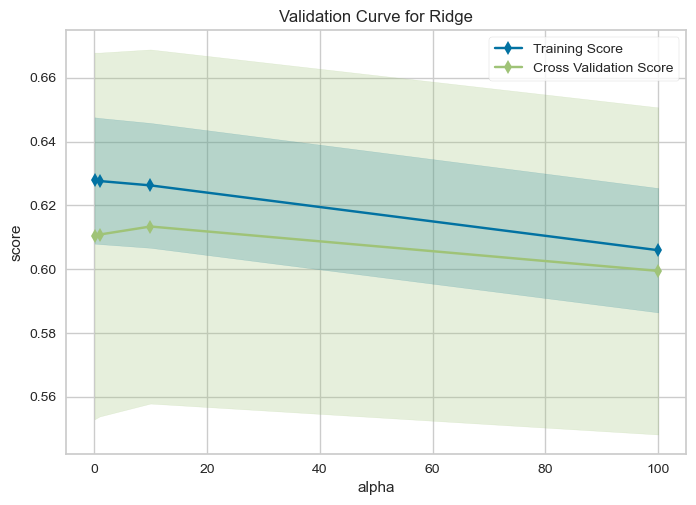

In [18]:
modelII4 = ValidationCurve(Ridge(), param_name="alpha",
                            param_range=[0.1, 1, 10, 100], 
                            cv=4, scoring="r2")
assign_tts(df[:1000], modelII4, 'median_house_value', do_scale=True)
std_fit(modelII4)
#std_score(modelII4)
modelII4.finalize()

## III. Bias, Variance and Polynomial Regression

### Warm Ups

*Type the given code into the cell below*

---

**Add polynomial features to model:**
```python
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train, y_train)
```

In [19]:
modelIIIi = make_pipeline(PolynomialFeatures(2), LinearRegression())
assign_tts(df, modelIIIi, 'median_house_value', do_scale=True,
           features=['median_income'])
std_fit(modelIIIi)

**Predict and plot using model** 
```python
plt.scatter(X_test, y, color='gray')
plt.scatter(X_test, model.predict(X_test))
```

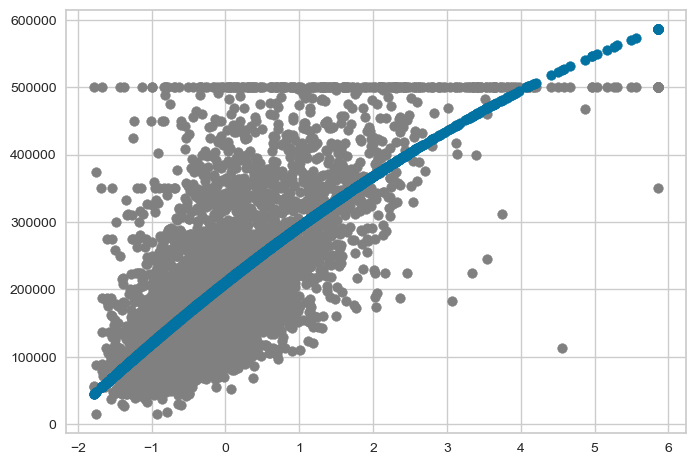

In [20]:
plt.scatter(modelIIIi.X_test, modelIIIi.y_test, color='gray')
plt.scatter(modelIIIi.X_test, std_predict(modelIIIi))

**Use a validation curve to test different polynomial degrees**
```python
model = ValidationCurve(model, 
                        param_name='polynomialfeatures__degree', 
                        param_range=range(1, 5))

model.fit(X, y)
```

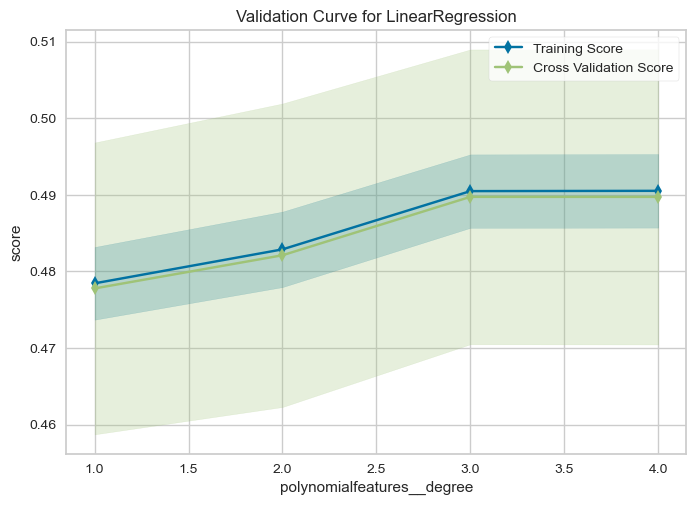

<Axes: title={'center': 'Validation Curve for LinearRegression'}, xlabel='polynomialfeatures__degree', ylabel='score'>

In [21]:
modelIIIii = ValidationCurve(modelIIIi, 
                        param_name='polynomialfeatures__degree', 
                        param_range=range(1, 5))
std_fit(modelIIIii)
modelIIIii.show()

### Exercises
---

**1. Let's say I have two columns** `x` **and** `y`. **If I add polynomial features up to degree 3, what will my columns look like? How many will I have?**

In [22]:
# 6 columns -- x, y, x**2, y**2, x**3, y**3

**2. Create an instance of** `PolynomialFeatures(2)` **called** `poly`

**Call** `.fit_transform()` **on X_train to see the transformed data**

In [23]:
modelIIIii.X_train

array([[-1.20588017],
       [ 0.44877754],
       [ 0.41750195],
       ...,
       [ 0.12912417],
       [-0.15619977],
       [-1.28185773]])

In [24]:
poly = PolynomialFeatures(2)
poly.fit_transform(modelIIIii.X_train)

array([[ 1.        , -1.20588017,  1.45414697],
       [ 1.        ,  0.44877754,  0.20140128],
       [ 1.        ,  0.41750195,  0.17430788],
       ...,
       [ 1.        ,  0.12912417,  0.01667305],
       [ 1.        , -0.15619977,  0.02439837],
       [ 1.        , -1.28185773,  1.64315925]])

**3. Create a pipeline with** `PolynomialFeatures(3)` **and a LinearRegression model**


In [25]:
pipeIII3 = make_pipeline(PolynomialFeatures(3), 
                         LinearRegression())
assign_tts(df, pipeIII3, 'median_house_value', do_scale=True,
           features=['median_income'])
std_fit(pipeIII3)

**4. Create a scatter plot of the model's predictions and the actual values** `median_home_value`

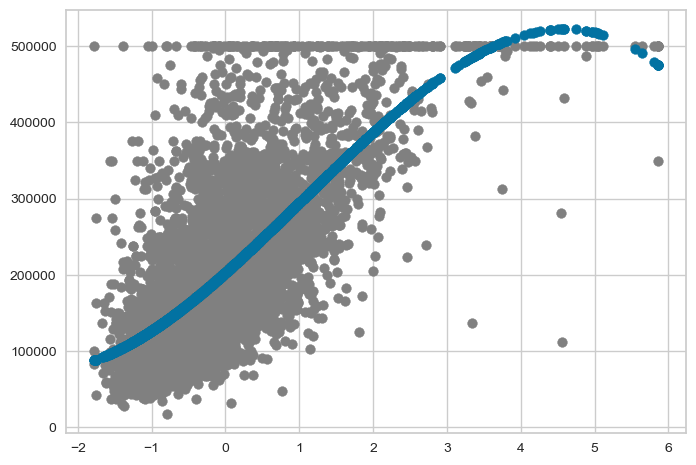

In [26]:
plt.scatter(pipeIII3.X_test, pipeIII3.y_test, color='gray')
plt.scatter(pipeIII3.X_test, std_predict(pipeIII3))

**5. Retrain the model using all the columns, instead of just** `median_income`

**What's the model's R2 score?**

In [27]:
assign_tts?

Signature: assign_tts(df, model, tgt_txt, do_scale=False, features='all')
Docstring: <no docstring>
File:      /var/folders/94/r7q1ltfd5cdf55qhtt067d380000gn/T/ipykernel_27475/574189090.py
Type:      function

In [28]:
pipeIII5 = make_pipeline(PolynomialFeatures(3), 
                         LinearRegression())
assign_tts(df, pipeIII5, 'median_house_value', do_scale=True,
           features='all')
std_fit(pipeIII5)
print(std_score(pipeIII5))
print(std_score(pipeIII5, test=False))

0.6982015117202078
0.7451541293678614


**6. Use a validation curve to test polynomial degrees up to 5.**

**At what degree does the model start to overfit?**

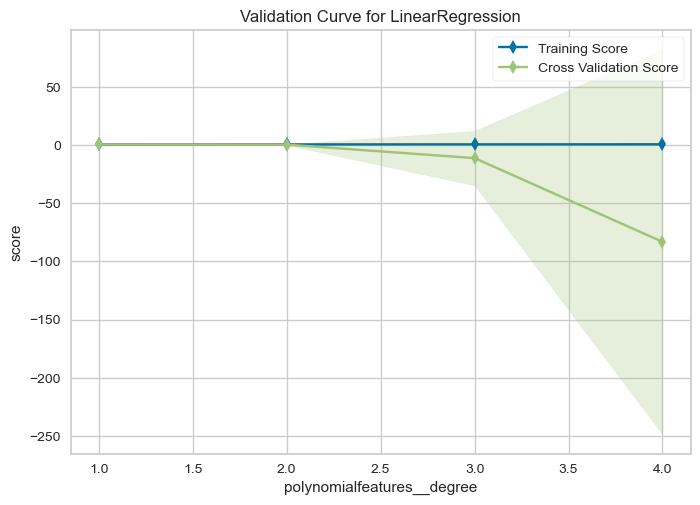

In [29]:
val = ValidationCurve(pipeIII5, 
                      param_name='polynomialfeatures__degree', 
                      param_range=range(1, 5))

assign_tts(df, val, 'median_house_value', do_scale=True,
           features='all')
std_fit(val)
val.finalize()